Load JSON

In [1]:
import json
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

class Config:
    def __init__(self, results_file='resultsshap.json'):
        self.results_file = results_file


    def load_results(self):
        if not os.path.exists(self.results_file):
            raise FileNotFoundError(f"{self.results_file} not found")
        with open(self.results_file, 'r') as f:
            results = json.load(f)
        print(f"Loaded {len(results)} samples from {self.results_file}")
        return results

# Initialize configuration
config = Config()
results = config.load_results()

Loaded 9914 samples from resultsshap.json


Loaded 9914 samples from resultsshap.json
Accuracy: 0.7042
Precision: 0.7537
Recall: 0.7042
F1 Score: 0.7028

Loaded 9914 samples from resultsshap.json
Accuracy: 0.7042
Precision: 0.7537
Recall: 0.7042
F1 Score: 0.7028


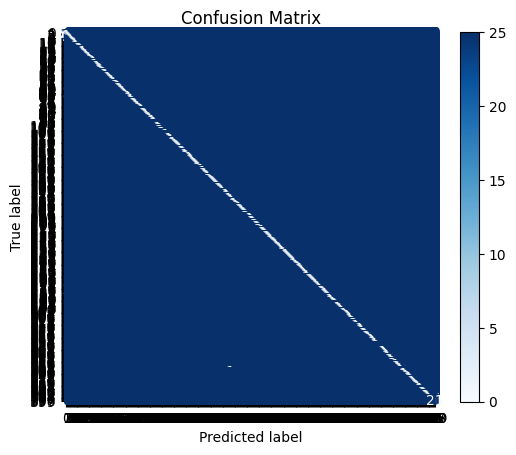

Mean Shapley Value (True Label): 0.0041, Variance: 0.0045
Mean Shapley Value (Predicted Label): 0.0046, Variance: 0.0057


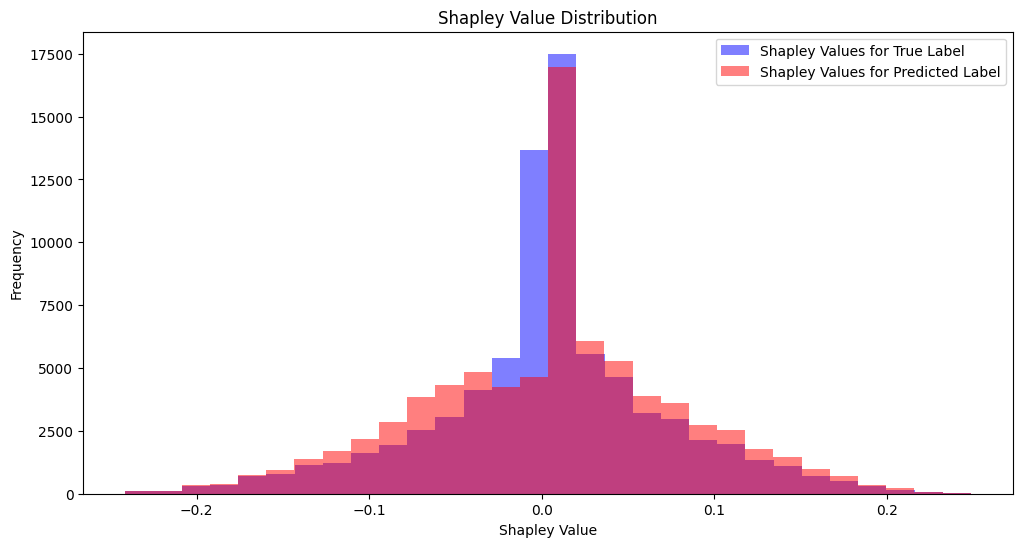

Correlation between Shapley Values and Accuracy: 0.0315
Mean Processing Time: 0.0000 seconds
Mean CPU Energy Consumption: 0.0000 J
Mean GPU Energy Consumption: 0.0000 J


In [2]:
import json
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy import stats

class Config:
    def __init__(self, results_file='resultsshap.json'):
        self.results_file = results_file

    def load_results(self):
        if not os.path.exists(self.results_file):
            raise FileNotFoundError(f"{self.results_file} not found")
        with open(self.results_file, 'r') as f:
            results = json.load(f)
        print(f"Loaded {len(results)} samples from {self.results_file}")
        return results

# Initialize configuration
config = Config()
results = config.load_results()

# 计算分类性能指标
def compute_classification_metrics(results):
    true_labels = [result['video_true_label'] for result in results]
    pred_labels = [result['video_pred_label'] for result in results]
    
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')
    f1 = f1_score(true_labels, pred_labels, average='weighted')
    
    return accuracy, precision, recall, f1

# 绘制混淆矩阵
def plot_confusion_matrix(results):
    true_labels = [result['video_true_label'] for result in results]
    pred_labels = [result['video_pred_label'] for result in results]
    
    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# 计算Shapley值的统计信息
def compute_shapley_statistics(results):
    shapley_values_true = []
    shapley_values_pred = []

    for result in results:
        for segment in result['segments']:
            shapley_values_true.append(segment['sv_true_label'])
            shapley_values_pred.append(segment['sv_video_pred'])

    mean_true = np.mean(shapley_values_true)
    mean_pred = np.mean(shapley_values_pred)
    var_true = np.var(shapley_values_true)
    var_pred = np.var(shapley_values_pred)
    
    return mean_true, mean_pred, var_true, var_pred

# 绘制Shapley值分布图
def plot_shapley_value_distribution(results):
    shapley_values_true = []
    shapley_values_pred = []

    for result in results:
        for segment in result['segments']:
            shapley_values_true.append(segment['sv_true_label'])
            shapley_values_pred.append(segment['sv_video_pred'])

    plt.figure(figsize=(12, 6))
    plt.hist(shapley_values_true, bins=30, alpha=0.5, label='Shapley Values for True Label', color='blue')
    plt.hist(shapley_values_pred, bins=30, alpha=0.5, label='Shapley Values for Predicted Label', color='red')
    plt.xlabel('Shapley Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Shapley Value Distribution')
    plt.show()

# 计算Shapley值和分类准确率的相关性
def compute_shapley_accuracy_correlation(results):
    shapley_values = []
    accuracies = []

    for result in results:
        for segment in result['segments']:
            shapley_values.append(segment['sv_true_label'])
            accuracies.append(1 if result['video_true_label'] == result['video_pred_label'] else 0)
    
    correlation = np.corrcoef(shapley_values, accuracies)[0, 1]
    return correlation

# 计算时间和能耗
def compute_time_energy_metrics(results):
    times = [result.get('time_consumed', 0) for result in results]
    cpu_energies = [result.get('cpu_energy', 0) for result in results]
    gpu_energies = [result.get('gpu_energy', 0) for result in results]
    
    mean_time = np.mean(times)
    mean_cpu_energy = np.mean(cpu_energies)
    mean_gpu_energy = np.mean(gpu_energies)
    
    return mean_time, mean_cpu_energy, mean_gpu_energy

# 运行统计分析和绘图
accuracy, precision, recall, f1 = compute_classification_metrics(results)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

plot_confusion_matrix(results)

mean_true, mean_pred, var_true, var_pred = compute_shapley_statistics(results)
print(f"Mean Shapley Value (True Label): {mean_true:.4f}, Variance: {var_true:.4f}")
print(f"Mean Shapley Value (Predicted Label): {mean_pred:.4f}, Variance: {var_pred:.4f}")

plot_shapley_value_distribution(results)

correlation = compute_shapley_accuracy_correlation(results)
print(f"Correlation between Shapley Values and Accuracy: {correlation:.4f}")

mean_time, mean_cpu_energy, mean_gpu_energy = compute_time_energy_metrics(results)
print(f"Mean Processing Time: {mean_time:.4f} seconds")
print(f"Mean CPU Energy Consumption: {mean_cpu_energy:.4f} J")
print(f"Mean GPU Energy Consumption: {mean_gpu_energy:.4f} J")


In [3]:
import numpy as np
from scipy.stats import pearsonr

def compute_shapley_accuracy_correlation(results):
    shapley_values = []
    accuracies = []

    for result in results:
        for segment in result['segments']:
            shapley_values.append(segment['sv_true_label'])
            accuracies.append(1 if result['video_true_label'] == result['video_pred_label'] else 0)
    
    correlation, p_value = pearsonr(shapley_values, accuracies)
    return correlation, p_value

# 运行统计分析
results = config.load_results()

correlation, p_value = compute_shapley_accuracy_correlation(results)
print(f"Correlation between Shapley Values and Accuracy: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


Loaded 9914 samples from resultsshap.json
Correlation between Shapley Values and Accuracy: 0.0315
P-value: 0.0000


Start Evaluation

Fidelity

In [2]:
import json
import os
import av
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import TimesformerForVideoClassification, AutoImageProcessor
from scipy import stats

class Config:
    def __init__(self, results_file='resultsshap.json', video_directory='archive/videos_val', fidelity_file='shap_eva_fidelity.json', sample_size=None):
        self.results_file = results_file
        self.video_directory = video_directory
        self.fidelity_file = fidelity_file
        self.sample_size = sample_size

    def load_results(self):
        if not os.path.exists(self.results_file):
            raise FileNotFoundError(f"{self.results_file} not found")
        with open(self.results_file, 'r') as f:
            results = json.load(f)
        print(f"Loaded {len(results)} samples from {self.results_file}")
        if self.sample_size:
            results = results[:self.sample_size]
            print(f"Using {len(results)} samples for evaluation")
        return results

config = Config(sample_size=100)  # Set to None to use all data
results = config.load_results()

model_name = "facebook/timesformer-base-finetuned-k400"
model = TimesformerForVideoClassification.from_pretrained(model_name)
image_processor = AutoImageProcessor.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def split_video_into_segments(container, n_segments=8, frames_per_segment=16):
    frame_list = [frame.to_image() for frame in container.decode(video=0)]
    total_frames = len(frame_list)
    segment_length = total_frames // n_segments
    segments = []
    for i in range(n_segments):
        start = i * segment_length
        end = min(start + segment_length, total_frames)
        segment_frames = frame_list[start:end] if end - start == segment_length else frame_list[start:] + [frame_list[-1]] * (segment_length - (end - start))
        segments.append(segment_frames[:frames_per_segment])
    return segments

def predict_segment(segment):
    with torch.no_grad():
        inputs = image_processor(list(segment), return_tensors="pt")
        inputs = {k: v.to(device) for k, v in inputs.items()}
        outputs = model(**inputs)
        logits = outputs.logits
        probabilities = torch.nn.functional.softmax(logits, dim=-1)
    return probabilities.cpu().numpy()[0]

def load_fidelity_results(config):
    if os.path.exists(config.fidelity_file):
        with open(config.fidelity_file, 'r') as f:
            return json.load(f)
    return []

def save_fidelity_results(fidelity_results, config):
    with open(config.fidelity_file, 'w') as f:
        json.dump(fidelity_results, f, indent=4)

def evaluate_fidelity(results, config):
    fidelity_results = load_fidelity_results(config)
    processed_videos = {result['video_file'] for result in fidelity_results}
    
    for result in tqdm(results, desc="Evaluating videos"):
        video_file = result['video_file']
        
        if video_file in processed_videos:
            print(f"Video {video_file} already processed, skipping.")
            continue
        
        video_path = os.path.join(config.video_directory, video_file)
        
        if not os.path.exists(video_path):
            print(f"Warning: Video file not found: {video_path}")
            continue
        
        true_label = result['video_true_label']
        original_true_score = result['video_true_score']
        
        try:
            container = av.open(video_path)
            segments = split_video_into_segments(container)
            
            # Sort segments by SHAP values
            sorted_segments = sorted(enumerate(result['segments']), key=lambda x: x[1]['sv_true_label'], reverse=True)
            
            video_results = []
            for top_n in range(1, 9):
                selected_segments = [segments[idx] for idx, _ in sorted_segments[:top_n]]
                
                segment_probs = []
                for segment in selected_segments:
                    segment_probs.append(predict_segment(segment))
                
                avg_probs = np.mean(segment_probs, axis=0)
                new_true_score = avg_probs[true_label]
                
                video_results.append({
                    'top_n': top_n,
                    'true_label_score': float(new_true_score),
                    'score_change': float(new_true_score - original_true_score)
                })
            
            fidelity_results.append({
                'video_file': video_file,
                'original_true_score': original_true_score,
                'segment_results': video_results
            })
            
            # Save results after processing each video
            save_fidelity_results(fidelity_results, config)
            processed_videos.add(video_file)
            
        except Exception as e:
            print(f"Error processing video {video_file}: {str(e)}")
            continue
    
    return fidelity_results

fidelity_results = evaluate_fidelity(results, config)

def analyze_fidelity_results(fidelity_results):
    score_changes = [[] for _ in range(8)]
    actual_scores = [[] for _ in range(8)]
    
    for result in fidelity_results:
        original_score = result['original_true_score']
        for seg_result in result['segment_results']:
            top_n = seg_result['top_n']
            score_changes[top_n-1].append(seg_result['score_change'])
            actual_scores[top_n-1].append(seg_result['true_label_score'])
    
    return score_changes, actual_scores

def plot_fidelity_results(score_changes, actual_scores):
    # Plot for score changes
    plt.figure(figsize=(20, 15))
    
    plt.subplot(2, 2, 1)
    plt.boxplot(score_changes)
    plt.title('Distribution of Score Changes')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Score Change')
    
    plt.subplot(2, 2, 2)
    sns.violinplot(data=score_changes)
    plt.title('Violin Plot of Score Changes')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Score Change')
    
    plt.subplot(2, 2, 3)
    means = [np.mean(changes) for changes in score_changes]
    stds = [np.std(changes) for changes in score_changes]
    plt.errorbar(range(1, 9), means, yerr=stds, fmt='-o')
    plt.title('Mean Score Change with Error Bars')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Mean Score Change')
    
    plt.subplot(2, 2, 4)
    corr_matrix = np.corrcoef(score_changes)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Between Top-N Segments (Changes)')
    
    plt.tight_layout()
    plt.savefig('fidelity_analysis_changes.png', dpi=300)
    plt.close()

    # Plot for actual scores
    plt.figure(figsize=(20, 15))
    
    plt.subplot(2, 2, 1)
    plt.boxplot(actual_scores)
    plt.title('Distribution of Actual Scores')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Score')
    
    plt.subplot(2, 2, 2)
    sns.violinplot(data=actual_scores)
    plt.title('Violin Plot of Actual Scores')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Score')
    
    plt.subplot(2, 2, 3)
    means = [np.mean(scores) for scores in actual_scores]
    stds = [np.std(scores) for scores in actual_scores]
    plt.errorbar(range(1, 9), means, yerr=stds, fmt='-o')
    plt.title('Mean Actual Score with Error Bars')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Mean Score')
    
    plt.subplot(2, 2, 4)
    corr_matrix = np.corrcoef(actual_scores)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Between Top-N Segments (Actual Scores)')
    
    plt.tight_layout()
    plt.savefig('fidelity_analysis_scores.png', dpi=300)
    plt.close()

score_changes, actual_scores = analyze_fidelity_results(fidelity_results)
plot_fidelity_results(score_changes, actual_scores)

print("Analysis complete. Results saved in 'fidelity_analysis_results.json', 'fidelity_analysis_changes.png', and 'fidelity_analysis_scores.png'.")

# Additional statistical analysis
print("Score Changes Statistics:")
for i, changes in enumerate(score_changes, 1):
    mean = np.mean(changes)
    median = np.median(changes)
    std = np.std(changes)
    skew = stats.skew(changes)
    kurtosis = stats.kurtosis(changes)
    
    print(f"Top {i} segments:")
    print(f"  Mean: {mean:.4f}")
    print(f"  Median: {median:.4f}")
    print(f"  Standard Deviation: {std:.4f}")
    print(f"  Skewness: {skew:.4f}")
    print(f"  Kurtosis: {kurtosis:.4f}")
    print()

print("\nActual Scores Statistics:")
for i, scores in enumerate(actual_scores, 1):
    mean = np.mean(scores)
    median = np.median(scores)
    std = np.std(scores)
    skew = stats.skew(scores)
    kurtosis = stats.kurtosis(scores)
    
    print(f"Top {i} segments:")
    print(f"  Mean: {mean:.4f}")
    print(f"  Median: {median:.4f}")
    print(f"  Standard Deviation: {std:.4f}")
    print(f"  Skewness: {skew:.4f}")
    print(f"  Kurtosis: {kurtosis:.4f}")
    print()

# Save detailed results
with open('fidelity_analysis_results.json', 'w') as f:
    json.dump({
        'score_changes': {
            'data': score_changes,
            'statistics': [{
                'top_n': i+1,
                'mean': float(np.mean(changes)),
                'median': float(np.median(changes)),
                'std': float(np.std(changes)),
                'skewness': float(stats.skew(changes)),
                'kurtosis': float(stats.kurtosis(changes))
            } for i, changes in enumerate(score_changes)]
        },
        'actual_scores': {
            'data': actual_scores,
            'statistics': [{
                'top_n': i+1,
                'mean': float(np.mean(scores)),
                'median': float(np.median(scores)),
                'std': float(np.std(scores)),
                'skewness': float(stats.skew(scores)),
                'kurtosis': float(stats.kurtosis(scores))
            } for i, scores in enumerate(actual_scores)]
        }
    }, f, indent=4)

print("Analysis complete. Results saved in 'fidelity_analysis_results.json' and 'fidelity_analysis.png'.")

Loaded 9914 samples from resultsshap.json
Using 100 samples for evaluation


/home/z/miniconda3/envs/mmxai/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Evaluating videos: 100%|██████████| 100/100 [18:17<00:00, 10.98s/it]


Score Changes Statistics:
Top 1 segments:
  Mean: 0.2846
  Median: 0.2497
  Standard Deviation: 0.2170
  Skewness: 0.3705
  Kurtosis: -1.0790

Top 2 segments:
  Mean: 0.2525
  Median: 0.2342
  Standard Deviation: 0.1888
  Skewness: 0.2634
  Kurtosis: -1.1139

Top 3 segments:
  Mean: 0.2211
  Median: 0.2031
  Standard Deviation: 0.1654
  Skewness: 0.2783
  Kurtosis: -1.1078

Top 4 segments:
  Mean: 0.1834
  Median: 0.1686
  Standard Deviation: 0.1367
  Skewness: 0.2910
  Kurtosis: -0.9946

Top 5 segments:
  Mean: 0.1381
  Median: 0.1284
  Standard Deviation: 0.1030
  Skewness: 0.3597
  Kurtosis: -0.6704

Top 6 segments:
  Mean: 0.0940
  Median: 0.0931
  Standard Deviation: 0.0703
  Skewness: 0.3196
  Kurtosis: -0.4196

Top 7 segments:
  Mean: 0.0497
  Median: 0.0443
  Standard Deviation: 0.0429
  Skewness: 0.2595
  Kurtosis: 0.2694

Top 8 segments:
  Mean: 0.0070
  Median: 0.0028
  Standard Deviation: 0.0250
  Skewness: -0.1567
  Kurtosis: 3.1110


Actual Scores Statistics:
Top 1 segmen

Plot

In [3]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def load_and_plot_results(file_path='fidelity_analysis_results.json'):
    # Load the JSON data
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    score_changes = data['score_changes']['data']
    actual_scores = data['actual_scores']['data']
    
    # Plot for score changes
    plt.figure(figsize=(20, 15))
    
    plt.subplot(2, 2, 1)
    plt.boxplot(score_changes)
    plt.title('Distribution of Score Changes')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Score Change')
    
    plt.subplot(2, 2, 2)
    sns.violinplot(data=score_changes)
    plt.title('Violin Plot of Score Changes')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Score Change')
    
    plt.subplot(2, 2, 3)
    means = [np.mean(changes) for changes in score_changes]
    stds = [np.std(changes) for changes in score_changes]
    plt.errorbar(range(1, 9), means, yerr=stds, fmt='-o')
    plt.title('Mean Score Change with Error Bars')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Mean Score Change')
    
    plt.subplot(2, 2, 4)
    corr_matrix = np.corrcoef(score_changes)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Between Top-N Segments (Changes)')
    
    plt.tight_layout()
    plt.savefig('fidelity_analysis_changes_from_json.png', dpi=300)
    plt.close()

    # Plot for actual scores
    plt.figure(figsize=(20, 15))
    
    plt.subplot(2, 2, 1)
    plt.boxplot(actual_scores)
    plt.title('Distribution of Actual Scores')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Score')
    
    plt.subplot(2, 2, 2)
    sns.violinplot(data=actual_scores)
    plt.title('Violin Plot of Actual Scores')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Score')
    
    plt.subplot(2, 2, 3)
    means = [np.mean(scores) for scores in actual_scores]
    stds = [np.std(scores) for scores in actual_scores]
    plt.errorbar(range(1, 9), means, yerr=stds, fmt='-o')
    plt.title('Mean Actual Score with Error Bars')
    plt.xlabel('Number of Top Segments')
    plt.ylabel('Mean Score')
    
    plt.subplot(2, 2, 4)
    corr_matrix = np.corrcoef(actual_scores)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Between Top-N Segments (Actual Scores)')
    
    plt.tight_layout()
    plt.savefig('fidelity_analysis_scores_from_json.png', dpi=300)
    plt.close()

    # Print summary statistics
    print("Summary Statistics:")
    for data_type in ['score_changes', 'actual_scores']:
        print(f"\n{data_type.replace('_', ' ').title()}:")
        for stat in data[data_type]['statistics']:
            print(f"  Top {stat['top_n']} segments:")
            print(f"    Mean: {stat['mean']:.4f}")
            print(f"    Median: {stat['median']:.4f}")
            print(f"    Standard Deviation: {stat['std']:.4f}")
            print(f"    Skewness: {stat['skewness']:.4f}")
            print(f"    Kurtosis: {stat['kurtosis']:.4f}")

# Call the function to load data and generate plots
load_and_plot_results()

print("Analysis complete. Plots saved as 'fidelity_analysis_changes_from_json.png' and 'fidelity_analysis_scores_from_json.png'.")

Summary Statistics:

Score Changes:
  Top 1 segments:
    Mean: 0.2846
    Median: 0.2497
    Standard Deviation: 0.2170
    Skewness: 0.3705
    Kurtosis: -1.0790
  Top 2 segments:
    Mean: 0.2525
    Median: 0.2342
    Standard Deviation: 0.1888
    Skewness: 0.2634
    Kurtosis: -1.1139
  Top 3 segments:
    Mean: 0.2211
    Median: 0.2031
    Standard Deviation: 0.1654
    Skewness: 0.2783
    Kurtosis: -1.1078
  Top 4 segments:
    Mean: 0.1834
    Median: 0.1686
    Standard Deviation: 0.1367
    Skewness: 0.2910
    Kurtosis: -0.9946
  Top 5 segments:
    Mean: 0.1381
    Median: 0.1284
    Standard Deviation: 0.1030
    Skewness: 0.3597
    Kurtosis: -0.6704
  Top 6 segments:
    Mean: 0.0940
    Median: 0.0931
    Standard Deviation: 0.0703
    Skewness: 0.3196
    Kurtosis: -0.4196
  Top 7 segments:
    Mean: 0.0497
    Median: 0.0443
    Standard Deviation: 0.0429
    Skewness: 0.2595
    Kurtosis: 0.2694
  Top 8 segments:
    Mean: 0.0070
    Median: 0.0028
    Standard De

Stability

In [4]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from tqdm import tqdm
from scipy import stats
import pandas as pd

class Config:
    def __init__(self, results_file='resultsshap.json', stability_file='explanation_stability.json'):
        self.results_file = results_file
        self.stability_file = stability_file

    def load_results(self):
        if not os.path.exists(self.results_file):
            raise FileNotFoundError(f"{self.results_file} not found")
        with open(self.results_file, 'r') as f:
            results = json.load(f)
        print(f"Loaded {len(results)} samples from {self.results_file}")
        return results

def calculate_explanation_stability(results):
    all_shap_values = []
    for result in tqdm(results, desc="Processing videos for stability"):
        if 'segments' in result and result['segments']:
            shap_values = [seg['sv_true_label'] for seg in result['segments'] if 'sv_true_label' in seg]
            if shap_values:
                all_shap_values.append(shap_values)
    
    if not all_shap_values:
        raise ValueError("No valid SHAP values found in the results")
    
    # Ensure all SHAP value vectors have the same length
    min_length = min(len(shap) for shap in all_shap_values)
    all_shap_values = [shap[:min_length] for shap in all_shap_values]
    
    # Calculate distances between SHAP values
    distances = pdist(all_shap_values, metric='euclidean')
    
    return distances, all_shap_values

def plot_explanation_stability(distances, all_shap_values):
    plt.figure(figsize=(20, 15))
    plt.suptitle('Explanation Stability Analysis', fontsize=16)
    
    # 1. Violin Plot
    plt.subplot(2, 2, 1)
    sns.violinplot(data=distances)
    plt.title('Distribution of Distances')
    plt.ylabel('Distance')

    # 2. Histogram
    plt.subplot(2, 2, 2)
    plt.hist(distances, bins=30, edgecolor='black')
    plt.title('Histogram of Distances')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')

    # 3. Box Plot
    plt.subplot(2, 2, 3)
    plt.boxplot(distances)
    plt.title('Box Plot of Distances')
    plt.ylabel('Distance')

    # 4. SHAP Values Heatmap
    plt.subplot(2, 2, 4)
    sns.heatmap(all_shap_values[:100], cmap='viridis')  # Limit to first 100 for visibility
    plt.title('SHAP Values Heatmap (First 100 Samples)')
    plt.xlabel('Segment Index')
    plt.ylabel('Video Index')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('explanation_stability_analysis.png', dpi=300)
    plt.close()

def plot_segment_importance(all_shap_values):
    segment_importance = np.abs(all_shap_values).mean(axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(segment_importance) + 1), segment_importance)
    plt.title('Average Absolute SHAP Value per Segment')
    plt.xlabel('Segment Index')
    plt.ylabel('Average Absolute SHAP Value')
    plt.savefig('segment_importance.png', dpi=300)
    plt.close()

def calculate_statistics(distances):
    return {
        "mean": np.mean(distances),
        "median": np.median(distances),
        "std": np.std(distances),
        "min": np.min(distances),
        "max": np.max(distances),
        "skewness": stats.skew(distances),
        "kurtosis": stats.kurtosis(distances)
    }

def main():
    config = Config()
    results = config.load_results()

    try:
        distances, all_shap_values = calculate_explanation_stability(results)
    except ValueError as e:
        print(f"Error: {e}")
        return

    stats_dict = calculate_statistics(distances)
    
    print("Explanation Stability Statistics:")
    for key, value in stats_dict.items():
        print(f"{key.capitalize()}: {value:.4f}")

    plot_explanation_stability(distances, all_shap_values)
    plot_segment_importance(all_shap_values)

    # Save results to JSON file
    stability_results = {
        "statistics": stats_dict,
        "all_distances": distances.tolist(),
        "segment_importance": np.abs(all_shap_values).mean(axis=0).tolist()
    }

    with open(config.stability_file, 'w') as f:
        json.dump(stability_results, f, indent=4)

    print(f"Stability results saved to {config.stability_file}")
    print(f"Plots saved to explanation_stability_analysis.png and segment_importance.png")

    # Additional analysis: Correlation between segment importances
    segment_importances = np.abs(all_shap_values)
    correlation_matrix = np.corrcoef(segment_importances.T)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation between Segment Importances')
    plt.savefig('segment_importance_correlation.png', dpi=300)
    plt.close()

    # Stability across different videos
    video_stabilities = pdist(segment_importances, metric='euclidean')
    
    plt.figure(figsize=(10, 6))
    sns.histplot(video_stabilities, kde=True)
    plt.title('Distribution of Stability Across Videos')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Frequency')
    plt.savefig('video_stability_distribution.png', dpi=300)
    plt.close()

if __name__ == "__main__":
    main()

Loaded 9914 samples from resultsshap.json


Processing videos for stability: 100%|██████████| 9914/9914 [00:00<00:00, 529751.70it/s]


Explanation Stability Statistics:
Mean: 0.2381
Median: 0.2454
Std: 0.1232
Min: 0.0000
Max: 0.8005
Skewness: 0.0978
Kurtosis: -0.2534
Stability results saved to explanation_stability.json
Plots saved to explanation_stability_analysis.png and segment_importance.png


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

Top-N stability evaluation

In [5]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from tqdm import tqdm
from scipy import stats
import argparse
import random

class Config:
    def __init__(self, results_file='resultsshap.json', stability_file='explanation_stability.json', sample_size=None):
        self.results_file = results_file
        self.stability_file = stability_file
        self.sample_size = sample_size

    def load_results(self):
        if not os.path.exists(self.results_file):
            raise FileNotFoundError(f"{self.results_file} not found")
        with open(self.results_file, 'r') as f:
            results = json.load(f)
        print(f"Loaded {len(results)} samples from {self.results_file}")
        if self.sample_size and self.sample_size < len(results):
            results = random.sample(results, self.sample_size)
            print(f"Randomly sampled {self.sample_size} results for analysis")
        return results

def calculate_explanation_stability(results):
    all_shap_values = []
    for result in tqdm(results, desc="Processing videos for stability"):
        if 'segments' in result and result['segments']:
            shap_values = [seg['sv_true_label'] for seg in result['segments'] if 'sv_true_label' in seg]
            if shap_values:
                all_shap_values.append(shap_values)
    
    if not all_shap_values:
        raise ValueError("No valid SHAP values found in the results")
    
    # Ensure all SHAP value vectors have the same length
    min_length = min(len(shap) for shap in all_shap_values)
    all_shap_values = np.array([shap[:min_length] for shap in all_shap_values])
    
    return all_shap_values

def calculate_stability_for_top_n(all_shap_values, n):
    top_n_indices = np.argsort(-np.abs(all_shap_values), axis=1)[:, :n]
    top_n_values = np.take_along_axis(all_shap_values, top_n_indices, axis=1)
    distances = pdist(top_n_values, metric='euclidean')
    return distances

def plot_explanation_stability(all_distances, all_shap_values):
    plt.figure(figsize=(20, 15))
    plt.suptitle('Explanation Stability Analysis', fontsize=16)
    
    # 1. Violin Plot
    plt.subplot(2, 2, 1)
    sns.violinplot(data=all_distances)
    plt.title('Distribution of Distances')
    plt.ylabel('Distance')
    plt.xlabel('Top-N Segments')

    # 2. Box Plot
    plt.subplot(2, 2, 2)
    plt.boxplot(all_distances)
    plt.title('Box Plot of Distances')
    plt.ylabel('Distance')
    plt.xlabel('Top-N Segments')

    # 3. Mean and Standard Deviation
    means = [np.mean(dist) for dist in all_distances]
    stds = [np.std(dist) for dist in all_distances]
    plt.subplot(2, 2, 3)
    plt.errorbar(range(1, len(means)+1), means, yerr=stds, fmt='o-')
    plt.title('Mean Distance with Standard Deviation')
    plt.xlabel('Top-N Segments')
    plt.ylabel('Mean Distance')

    # 4. SHAP Values Heatmap
    plt.subplot(2, 2, 4)
    sns.heatmap(all_shap_values[:min(100, len(all_shap_values))], cmap='viridis')
    plt.title(f'SHAP Values Heatmap (First {min(100, len(all_shap_values))} Samples)')
    plt.xlabel('Segment Index')
    plt.ylabel('Video Index')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('explanation_stability_analysis.png', dpi=300)
    plt.close()

def plot_segment_importance(all_shap_values):
    segment_importance = np.abs(all_shap_values).mean(axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(segment_importance) + 1), segment_importance)
    plt.title('Average Absolute SHAP Value per Segment')
    plt.xlabel('Segment Index')
    plt.ylabel('Average Absolute SHAP Value')
    plt.savefig('segment_importance.png', dpi=300)
    plt.close()

def calculate_statistics(distances):
    return {
        "mean": float(np.mean(distances)),
        "median": float(np.median(distances)),
        "std": float(np.std(distances)),
        "min": float(np.min(distances)),
        "max": float(np.max(distances)),
        "skewness": float(stats.skew(distances)),
        "kurtosis": float(stats.kurtosis(distances))
    }

def main(sample_size=2000):
    config = Config(sample_size=sample_size)
    results = config.load_results()

    try:
        all_shap_values = calculate_explanation_stability(results)
    except ValueError as e:
        print(f"Error: {e}")
        return

    all_distances = []
    all_stats = []
    for n in tqdm(range(1, len(all_shap_values[0]) + 1), desc="Calculating stability for top-N"):
        distances = calculate_stability_for_top_n(all_shap_values, n)
        all_distances.append(distances)
        all_stats.append(calculate_statistics(distances))

    plot_explanation_stability(all_distances, all_shap_values)
    plot_segment_importance(all_shap_values)

    # Save results to JSON file
    stability_results = {
        "statistics": all_stats,
        "segment_importance": np.abs(all_shap_values).mean(axis=0).tolist()
    }

    with open(config.stability_file, 'w') as f:
        json.dump(stability_results, f, indent=4)

    print(f"Stability results saved to {config.stability_file}")
    print(f"Plots saved to explanation_stability_analysis.png and segment_importance.png")

    # Additional analysis: Correlation between segment importances
    segment_importances = np.abs(all_shap_values)
    correlation_matrix = np.corrcoef(segment_importances.T)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation between Segment Importances')
    plt.savefig('segment_importance_correlation.png', dpi=300)
    plt.close()

    # Stability trend across different top-N selections
    plt.figure(figsize=(10, 6))
    means = [np.mean(dist) for dist in all_distances]
    plt.plot(range(1, len(means)+1), means, marker='o')
    plt.title('Stability Trend Across Top-N Segments')
    plt.xlabel('Number of Top Segments (N)')
    plt.ylabel('Mean Distance (Lower is more stable)')
    plt.savefig('stability_trend.png', dpi=300)
    plt.close()

if __name__ == "__main__":
  
    main()

Loaded 9914 samples from resultsshap.json
Randomly sampled 2000 results for analysis


Calculating stability for top-N: 100%|██████████| 8/8 [00:00<00:00, 15.86it/s]


Stability results saved to explanation_stability.json
Plots saved to explanation_stability_analysis.png and segment_importance.png
